<a href="https://colab.research.google.com/github/keeptrain/Culinarix/blob/machine-learning/notebook/Copy_of_Pickle_Content_Based_Recommender_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Load Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving culinary_dataset.csv to culinary_dataset.csv
Saving culinary_rating.csv to culinary_rating.csv
Saving user.csv to user.csv


In [ ]:
rating = pd.read_csv('culinary_rating.csv')
place = pd.read_csv('culinary_dataset.csv')
user = pd.read_csv('user.csv')

# **Data Understanding**

**Dataset place**

Dataset place berisi informasi lengkap tentang restoran

> Pemblokiran indentasi



In [ ]:
print('Jumlah Sample      :', len(place.iloc[:,1]))
print('Jumlah Fitur       :', len(place.iloc[1,:]))
print(f'\nTerdapat {len(place.iloc[1,:])} Kolom Fitur pada Dataset yaitu:')
print('\nFitur Data        :', place.columns.tolist()[:])
pd.options.display.max_columns = None
place.head()

Jumlah Sample      : 371
Jumlah Fitur       : 11

Terdapat 11 Kolom Fitur pada Dataset yaitu:

Fitur Data        : ['Place_Id', 'Place_Name', 'Culinary_Ratings', 'Category', 'Address', 'Description', 'Coordinate', 'Lat', 'Long', 'Gmaps_Address', 'Image_Address']


,Place_Id,Place_Name,Culinary_Ratings,Category,Address,Description,Coordinate,Lat,Long,Gmaps_Address,Image_Address
0,1,Purnawarman Restaurant,4.5,Seafood,"Cicendo, Kota Bandung",Menyajikan menu buffet dengan hidangan seafood...,"{'lat': -6.907839576390254, 'lng':107.59639803...",-6.907840,107.596398,https://maps.app.goo.gl/JtJTxhjhFJNz5eJx5,https://lh5.googleusercontent.com/p/AF1QipPJP2...
1,2,Dakken Restaurant,4.5,Western,"Bandung Wetan, Kota Bandung","Makanan yang disajikan pun beragam, dari spagg...","{'lat':-6.90017082728352, 'lng':107.6176840429...",-6.900171,107.617684,https://maps.app.goo.gl/jNdM6dwB75VYEwgJ7,https://lh5.googleusercontent.com/p/AF1QipMgAr...
2,3,Warung Suluh Restaurant,4.4,Indonesian,"Cicendo, Kota Bandung",Tempat makanan ini menyediakan beragam menu ya...,"{'lat':-6.9037495923328835, 'lng':107.59948793...",-6.903750,107.599488,https://maps.app.goo.gl/noWxDLUkQ6BZNSe26,https://lh5.googleusercontent.com/p/AF1QipNRV4...
3,4,Miss Bee Providore,4.5,Cafe,"Cidadap, Kota Bandung",Cafe luas dengan area duduk terbuka & tertutup...,"{'lat':-6.864075995849507, 'lng':107.608881072...",-6.864076,107.608881,https://maps.app.goo.gl/CjcYvVrmaduM4qdcA,https://lh5.googleusercontent.com/p/AF1QipOiks...
4,5,Braga Permai,4.5,Western,"Sumur Bandung, Kota Bandung",Hidangan internasional disajikan di restoran b...,"{'lat':-6.913126165281592, 'lng':107.608881072...",-6.913126,107.608881,https://maps.app.goo.gl/K4G2PQGaLLoiz6A29,https://lh5.googleusercontent.com/p/AF1QipO08x...


In [ ]:
place.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Place_Id          371 non-null    int64  
 1   Place_Name        371 non-null    object 
 2   Culinary_Ratings  371 non-null    float64
 3   Category          371 non-null    object 
 4   Address           371 non-null    object 
 5   Description       371 non-null    object 
 6   Coordinate        371 non-null    object 
 7   Lat               371 non-null    float64
 8   Long              371 non-null    float64
 9   Gmaps_Address     371 non-null    object 
 10  Image_Address     371 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 32.0+ KB


**Dataset rating**

Dataset rating berisi rating restoran yang diperoleh dari user

In [ ]:
rating

,User_Id,Place_Id,Culinary_Ratings
0,1,5,5
1,1,15,3
2,1,20,4
3,1,21,2
4,1,41,5
...,...,...,...
5687,200,332,2
5688,200,335,3
5689,200,336,3
5690,200,337,2


In [ ]:
rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating

,User_Id,Place_Id,Culinary_Ratings
0,36,1,4
1,38,1,2
2,64,1,2
3,74,1,2
4,86,1,4
...,...,...,...
5687,133,371,1
5688,137,371,5
5689,150,371,5
5690,163,371,1


In [ ]:
rating.shape

(5692, 3)

Terdapat 5692 sample ulasan berupa nilai rating dan berisi 3 fitur

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5692 entries, 0 to 5691
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   User_Id           5692 non-null   int64
 1   Place_Id          5692 non-null   int64
 2   Culinary_Ratings  5692 non-null   int64
dtypes: int64(3)
memory usage: 177.9 KB


Tidak terdapat missing value

**Dataset user**

In [ ]:
user

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",24
1,2,"Bekasi, Jawa Barat",25
2,3,"Bandung, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Bandung, Jawa Barat",20
...,...,...,...
195,196,"Bekasi, Jawa Barat",28
196,197,"Bogor, Jawa Barat",27
197,198,"Karawang, Jawa Barat",26
198,199,"Subang, Jawa Barat",18


In [ ]:
user.shape

(200, 3)

In [ ]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   200 non-null    int64 
 1   Location  200 non-null    object
 2   Age       200 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ KB


# ***Exploratory Data Analysis*** **(EDA)**

Distribusi Rata-Rata Rating Restoran

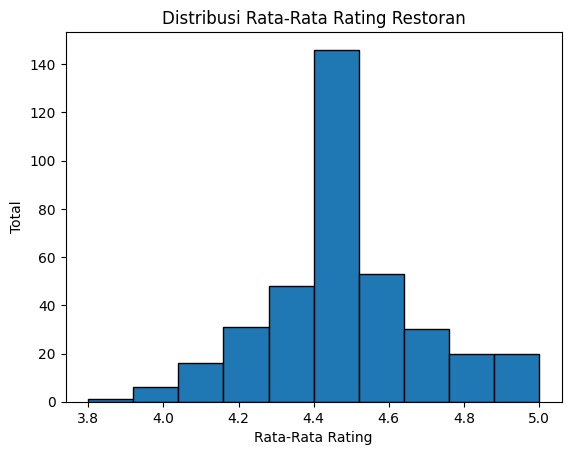

In [ ]:
plt.hist(place.Culinary_Ratings, edgecolor='black')
plt.ylabel('Total')
plt.xlabel('Rata-Rata Rating')
plt.title("Distribusi Rata-Rata Rating Restoran")
plt.show()

Persebaran Jumlah Restoran Berdasarkan Kategori

<ipython-input-14-5fb27e100ef7>:8: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in place['Category'].value_counts().iteritems():


Jumlah Restoran dengan Kategori Indonesian : 111
Jumlah Restoran dengan Kategori Sundanese : 72
Jumlah Restoran dengan Kategori Cafe : 55
Jumlah Restoran dengan Kategori Western : 28
Jumlah Restoran dengan Kategori Bakso : 28
Jumlah Restoran dengan Kategori Chicken : 19
Jumlah Restoran dengan Kategori Chinese : 15
Jumlah Restoran dengan Kategori Japanese : 15
Jumlah Restoran dengan Kategori Seafood : 10
Jumlah Restoran dengan Kategori Steak : 9
Jumlah Restoran dengan Kategori Korean : 9


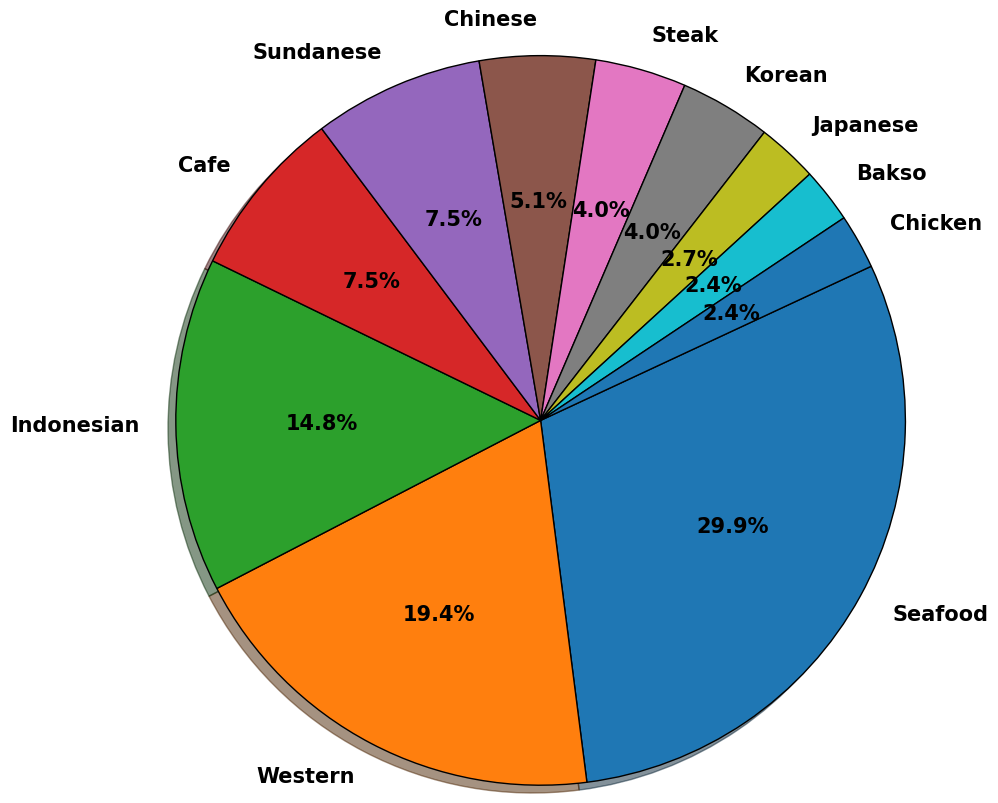

In [ ]:
columns_category_type = place['Category'].unique().tolist()
plt.rcParams["figure.figsize"] = (15,8)
plt.pie(place['Category'].value_counts(), autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, counterclock=False, shadow=True, startangle=25,
        radius=1.3, labels=columns_category_type, textprops={'fontsize': 15, 'weight': 'bold'})
plt.tight_layout()

for label, count in place['Category'].value_counts().iteritems():
    print("Jumlah Restoran dengan Kategori", label, ":", count)

Top 5 Restoran dengan Rating Terbanyak

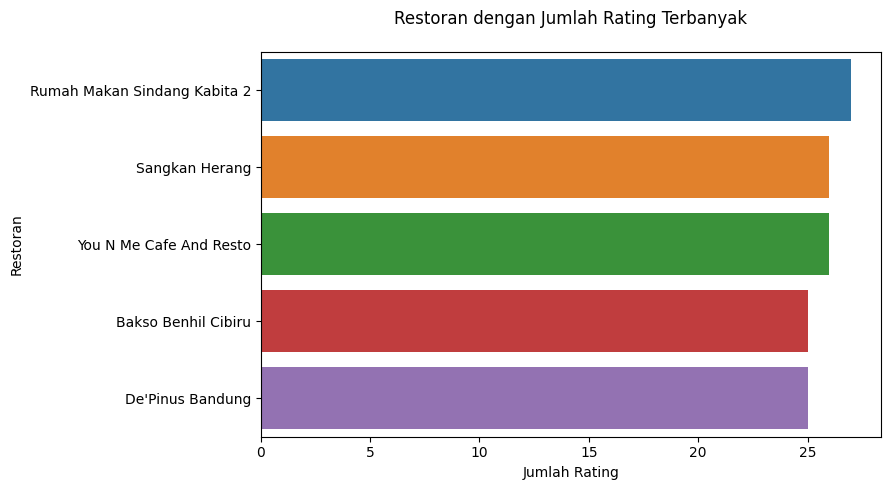

In [ ]:
top_5 = rating['Place_Id'].value_counts().reset_index()[0:5]
top_5 = pd.merge(top_5, place[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')
plt.figure(figsize=(8,5))
sns.barplot(x='Place_Id_x', y='Place_Name', data=top_5)
plt.title('Restoran dengan Jumlah Rating Terbanyak', pad=20)
plt.xlabel('Jumlah Rating')
plt.ylabel('Restoran')
plt.show()

Jumlah User dari Tiap Kota Asal

User berasal dari 28 kota berbeda


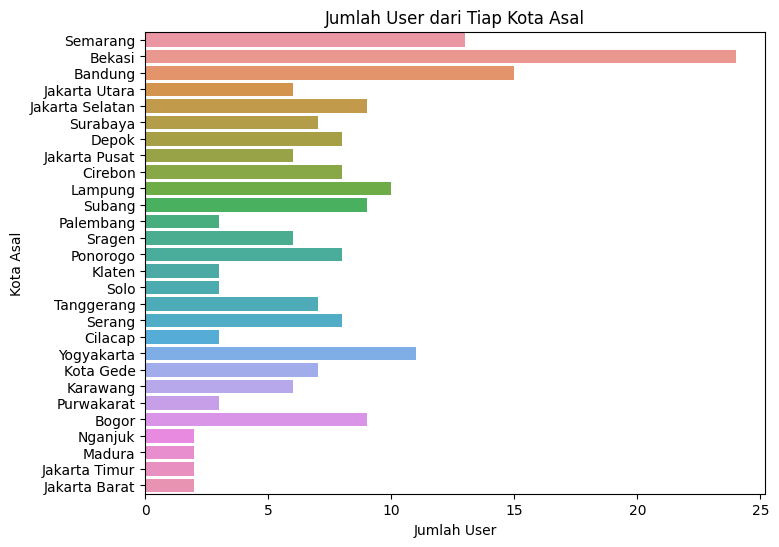

Jumlah User dari Kota Bekasi, Jawa Barat : 24
Jumlah User dari Kota Bandung, Jawa Barat : 15
Jumlah User dari Kota Semarang, Jawa Tengah : 13
Jumlah User dari Kota Yogyakarta, DIY : 11
Jumlah User dari Kota Lampung, Sumatera Selatan : 10
Jumlah User dari Kota Jakarta Selatan, DKI Jakarta : 9
Jumlah User dari Kota Bogor, Jawa Barat : 9
Jumlah User dari Kota Subang, Jawa Barat : 9
Jumlah User dari Kota Depok, Jawa Barat : 8
Jumlah User dari Kota Cirebon, Jawa Barat : 8
Jumlah User dari Kota Ponorogo, Jawa Timur : 8
Jumlah User dari Kota Serang, Banten : 8
Jumlah User dari Kota Surabaya, Jawa Timur : 7
Jumlah User dari Kota Kota Gede, DIY : 7
Jumlah User dari Kota Tanggerang, Banten : 7
Jumlah User dari Kota Jakarta Pusat, DKI Jakarta : 6
Jumlah User dari Kota Sragen, Jawa Tengah : 6
Jumlah User dari Kota Jakarta Utara, DKI Jakarta : 6
Jumlah User dari Kota Karawang, Jawa Barat : 6
Jumlah User dari Kota Purwakarat, Jawa Barat : 3
Jumlah User dari Kota Klaten, Jawa Tengah : 3
Jumlah User d

<ipython-input-16-7d91436356e0>:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in user['Location'].value_counts().iteritems():


In [ ]:
asalkota = user['Location'].apply(lambda x : x.split(',')[0])
plt.figure(figsize=(8,6))
sns.countplot(y=asalkota)
plt.xlabel('Jumlah User')
plt.ylabel('Kota Asal')
plt.title('Jumlah User dari Tiap Kota Asal')
print(f"User berasal dari {user['Location'].nunique()} kota berbeda")
plt.show()

for label, count in user['Location'].value_counts().iteritems():
    print("Jumlah User dari Kota", label, ":", count)

***Dataset rating***

In [ ]:
rating.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,User_Id,Place_Id,Culinary_Ratings
count,5692.00,5692.00,5692.00
mean,101.87,187.41,3.09
std,57.50,107.73,1.36
min,1.00,1.00,1.00
25%,52.00,93.00,2.00
50%,103.00,188.00,3.00
75%,152.00,281.00,4.00
max,200.00,371.00,5.00


Terdapat 5692 rating yang diberikan oleh user. Rata- rata rating adalah 3.1, dengan rating tertinggi adalah 5 dan rating terendah adalah 1

***Dataset *user****

In [ ]:
user.describe()

,User_Id,Age
count,200.000000,200.000000
mean,100.500000,28.565000
std,57.879185,6.401615
min,1.000000,18.000000
25%,50.750000,24.000000
50%,100.500000,29.000000
75%,150.250000,34.000000
max,200.000000,40.000000


Terdapat 200 pengguna atau user. Rata-rata usia dari seluruh pengguna adalah 28.6 tahun, dengan usia user termuda 18 tahun dan usia user tertua 40 tahun.

# **Modelling**

TF-IDF

In [ ]:
#Implementasi TF-IDF pada fitur 'Category'

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

tf.fit(place['Category'])

tf.get_feature_names_out()

array(['bakso', 'cafe', 'chicken', 'chinese', 'indonesian', 'japanese',
       'korean', 'seafood', 'steak', 'sundanese', 'western'], dtype=object)

In [ ]:
#Transformasi hasil TF-IDF menjadi matriks

tfidf_matrix = tf.fit_transform(place['Category'])
tfidf_matrix.shape

(371, 11)

In [ ]:
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.]])

In [ ]:
#Menampilkan hasil matriks dalam bentuk dataframe

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=place.Place_Name
).sample(10, axis=0)

,bakso,cafe,chicken,chinese,indonesian,japanese,korean,seafood,steak,sundanese,western
Place_Name,,,,,,,,,,,
Selera Sunda,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Giggle Box Kota Baru Parahyangan - Bandung,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
BaseCamp Cafe,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rumah Makan Padang Bagindo,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Warteg Berkah Bahari,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Rumah Makan Pulen Ciampel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Batagor Kingsley,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
RM. Saung Andir,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Seblak Kedai Warna,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
#Menampilkan hasil cosine similarity dalam bentuk dataframe

cosine_sim_df = pd.DataFrame(
    cosine_sim, index=place.Place_Name, columns=place.Place_Name)
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(10, axis=0)

Shape: (371, 371)


Place_Name,Purnawarman Restaurant,Dakken Restaurant,Warung Suluh Restaurant,Miss Bee Providore,Braga Permai,Nara Park Bandung,Saffron Restaurant,Kehidupan Tidak Pernah Berakhir,Raja Rasa,The Stone Cafe,Karnivor Restaurant,Feast Restaurant,The Restaurant - Padma Hotel Bandung,Alas Daun Restaurant,Gormeteria,Cocorico Cafe and Resto,Rose Flower Restaurant,Congo Gallery & Cafe,Kalpa Tree Dine and Chill,Bebek Kaleyo Bandung,Tizi Cake Shop & Restaurant,Glosis Restaurant,Hummingbird Eatery & Space,Queen Restaurant,Atmosphere Resort Café,Skyline Best View Resto,Parc de Ville Restaurant,Rijsttafel Resto,Sadrasa Kitchen & Bar,Pago Restaurant,The Square Restaurant Bandung,Dapur Dahapati,Cafe Bali,Belle Vue Roof Top 24 Hours French & Italian Bistro,Steak Ranjang Dipatiukur - Steak Enak di Bandung,Al Jazeerah Signature Middle East Restaurant And Cafe Bandung,Mie Rica Kejaksaan,WaLe Warung Lela,Tilu Kitchen and Patisserie,Bandung Suki,de sanirasa - Restoran Nusantara Bandung,Jing Paradise Chinese Fine Dining Restaurant,"Marugame Udon, Riau Bandung",Tanggo Pork Resto,Eastern Restaurant,Batagor Kingsley,Golden Flower Hotel - Lotus Garden Restaurant,MASA Restaurant,Sierra Cafe & Lounge,Bornga Korean Restaurant,Sajian Sambara,Tepian Rasa Live Seafood Bandung,Midori Japanese Restaurant Bandung,Streats Restaurant,SODA Resto & Bar,Ayam Bakar Wong Solo Bandung,Madame Sari Restaurant,Spice Affair Bandung Indian Fusion Cuisine,Shabu Hachi Cilaki Bandung,OZT Pork Ribs Bandung,Rumah Makan Khas Sunda Bale Gazeeboe Bandung,Royal Dynasty Restaurant,Warung Taru,Jiganasuki,Hong Sin Restaurant,Imperial Chinese Restaurant,Ahong Restaurant,Giggle Box BIP - Bandung Indah Plaza (Bandung),May Star Restaurant 23 Paskal,BMC 1928,Hotin,Sunda Bambu restaurant,Cuisine Momiji Cafe Bandung,He Fu Restaurant,Hara Café & Resto,The Restaurant at The Trans Luxury Hotel Bandung,The 18th Restaurant and Lounge,Kedai Rimbun Restaurant,Roemah Legit,Pepper Lunch,KARE Curry House,Chingu Cafe,Pasar Cisangkuy | Food Market,HDL 293 Seafood,Cafe D'Pakar,Fortunate Coffee Bandung,Above and Beyond Paskal Hyper Square,Yogurt Columbia,Pasadena Steak Bandung,Justus Steak House Braga,Padang Merdeka Bandung,Alam Desa (Sundanese Resto),Naima Bandung,Hongkong Restaurant,Ambrogio Patisserie,Hachi Grill Sutami Bandung,Shu Guo Yin Xiang Bandung,Kampung Muara Sunda Bandung,KFC Riau Bandung,Korean House Bandung,Balista Sushi & Tea Bandung - Jalan Ambon,The Kiosk Setiabudhi,Rumah Miring,Goldstar 360,Giggle Box Ciwalk - Bandung,A&W Restoran - Bandung Indah Plaza,"Sejiwa Coffee, Progo",Sin Sin Chinese Food Restaurant,Giggle Box - Braga City Walk Bandung,Saung Galih,Rumah Makan Saung T&T,Lisung Gunung Resto,RM. Kiambang Raya,Purbasari Makan Di Tepi Danau,Saung Bbc,Rumah Makan Alam Endah,Saung Apung De Lempung Kuring,Rumah Makan Pulen Ciampel,RM Nasi Timbel,TNT Saung Makan,Warung Nasi Liwet Saung Babakan Cinta,Saung Pengkolan 1,Xpose Resto & Cafe,Hawu kebon resto,Dapoer Kayoe,Warung Nasi Baheula Ibu Nunung,Mie Bakso Mas Ariel,Ten To Ten,Sahabat Floating Resto,Milagros Bandung Barat,Dapur Cemara,Warung nasi Sukahati Padalarang,Nyonya Delights,Sa Rang Bang,RM Setuju Utama,Waroeng Ethnic,GH Corner,"Saung Lesehan Ceu Dewi,Ikan-Ayam. Goreng/bakar",Cafe kadempit,EnakO,Bakso Three In One Mas Maji,Giggle Box Kota Baru Parahyangan - Bandung,Warung Nasi Khas Sunda Lalaban,Bakso Kerucut,BAB JIB,Waroeng Beje Restaurant,Respoegar,Wataki,Warung Nasi Ampera Padalarang,Saung Apung Pangaisan,Dapur Seblak Sodong,Rumah Makan Roky Minang Masakan Padang,Ayam Geprek & Pap's Spaghetti. Food Court ATB Padalarang Kab Bandung Barat,Pizza Hut Restoran,Toyama - Japanese Restaurant,CANTON - Chinese Cuisine,Gyumbox Kota Baru Parahyangan,baso koboy,Morning Glory,D'plate resto II,Kedai 78 seafood & chinese food,Double Three Cafe,Rumah Bento Padalarang,Kedai Dua Putra,Ayam Penyet Ria Kota Baru Parahyangan,Rumah Makan Mahkota Minang,Sangkan Herang,Rumah Makan Sedap Cimareme,Oleh - Oleh Khas Bandung Oncom Wendy,RM. tarako minang,Food Court

# **Implementasi Sistem Rekomendasi**

In [ ]:
def resto_recommendations(place_name, similarity_data=cosine_sim_df, items=place[['Place_Name', 'Category']], k=10):
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(range(-1, -k, -1))
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

In [ ]:
import pickle

# Save the function using pickle
with open('resto_recommendations.pkl', 'wb') as file:
    pickle.dump(resto_recommendations, file)

Pendefinisian Restoran di Bandung yang pernah dikunjungi user sehingga sistem dapat mengembalikan informasi rekomendasi berdasarkan inputan yang diberikan

In [ ]:
place_name = 'Ayam Geprek Pangeran Cinunuk'
place[place.Place_Name.eq(place_name)]

,Place_Id,Place_Name,Culinary_Ratings,Category,Address,Description,Coordinate,Lat,Long,Gmaps_Address,Image_Address
288,289,Ayam Geprek Pangeran Cinunuk,4.6,Chicken,"Panyileukan, Kota Bandung","Ayam geprek yang lezat dan pedas, dengan ayam ...","{'lat':-6.942085638609848, 'lng':107.714317681...",-6.942086,107.714318,https://maps.app.goo.gl/VYBfAWW3Cb16u2fo9,https://lh5.googleusercontent.com/p/AF1QipOXQW...


Hasil 10 Top Rekomendasi

In [ ]:
resto_recommendations(place_name)

,Place_Name,Category
0,Ayam Gepuk Pak Gembus Cibaduyut,Chicken
1,Ayam Geprek & Pap's Spaghetti. Food Court ATB ...,Chicken
2,Ayam Bakar KQ5 Ujung Berung,Chicken
3,Ayam Penyet Esti,Chicken
4,Ayam Geprek Pangeran Cipadung,Chicken
5,Ayam Geprek Mekarsari,Chicken
6,Ayam Bersih Berkah Permata Biru,Chicken
7,D'Winner Ayam Geprek,Chicken
8,McDonald's Cibiru,Chicken
9,RM. Ayam Bakar Mamah Haji,Chicken
